<a href="https://colab.research.google.com/github/Qraree/jupyter-notebooks/blob/main/Segmentation_by_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
def resize_img(image, size):
  width = int(image.shape[1] * size / 100)
  height = int(image.shape[0] * size / 100)
  dim = (width, height)

  return cv.resize(image, dim, interpolation = cv.INTER_AREA)


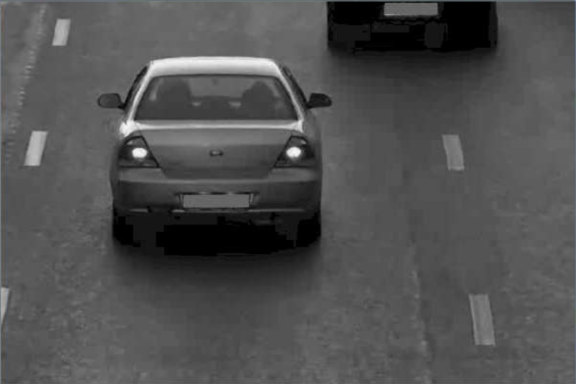

In [ ]:
car_1 = cv.imread('first_car.png')
car_2 = cv.imread('second_car.png')

resize = 40

car_1_resized = resize_img(car_1, resize)
car_2_resized = resize_img(car_2, resize)

cv2_imshow(car_1_resized)

## Получение межкадровой разницы

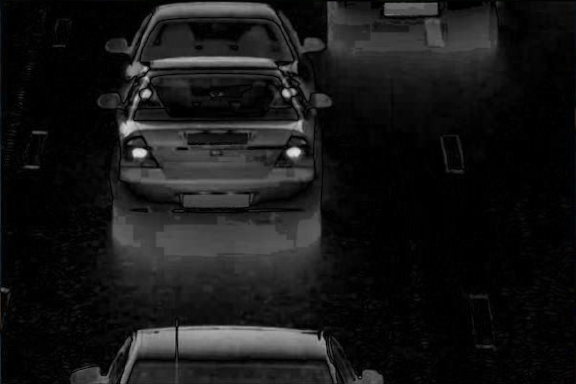

In [ ]:
mad = cv.absdiff(car_2_resized, car_1_resized)
cv2_imshow(mad)

## Получение контурного препарата

### Фильтр Собеля

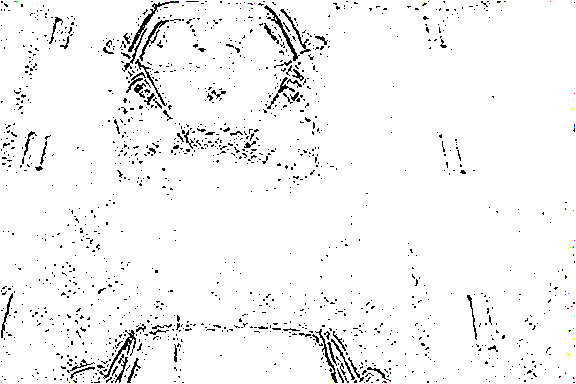

In [ ]:
ddepth = cv.CV_8U
scale = 1
delta = 0
sobel = cv.Sobel(car_2_resized, -1, 1, 1, ksize=3)
ret, thresh1 = cv.threshold(sobel, 5, 255, cv.THRESH_BINARY_INV)
cv2_imshow(thresh1)

### Фильтр Кэнни

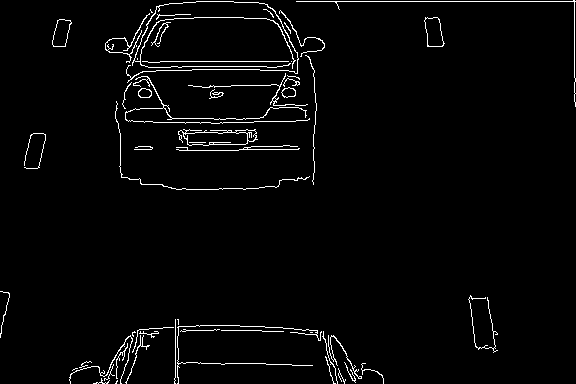

In [ ]:
canny = cv.Canny(car_2_resized, 50, 200)
cv2_imshow(canny)

## Логическое И (Контурного препарата и межкадровой разницы)

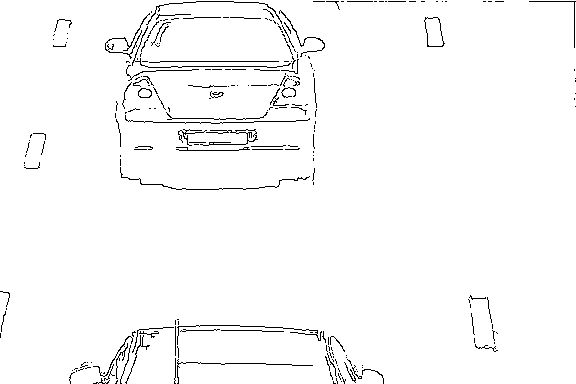

In [ ]:
mad_gray = cv.cvtColor(mad, cv.COLOR_BGR2GRAY)
bit_and = np.bitwise_and(mad_gray, canny)
ret, bit_thresh = cv.threshold(bit_and, 5, 255, cv.THRESH_BINARY_INV)
cv2_imshow(bit_thresh)

## Морфологическая фильтрация

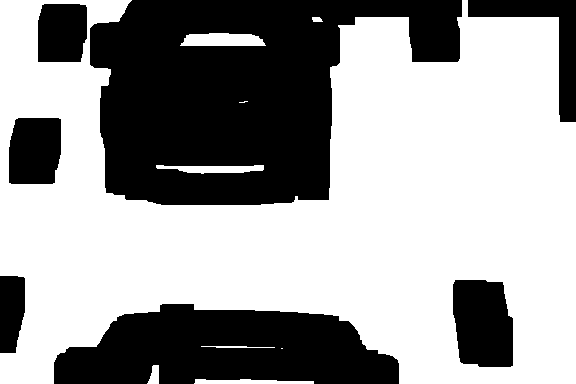

In [193]:
element = cv.getStructuringElement(cv.MORPH_RECT, (31, 31), (16, 16))
erosion = cv.morphologyEx(bit_thresh, cv.MORPH_ERODE, element)
cv2_imshow(erosion)

## Наложение строба на объект